In [1]:
import ipynbname

title = ipynbname.name().replace('_', ' ')
from benchmark import benchmark, method_constructor, latex_table, violin_plot, unused_project_directories, all_project_directories

In [19]:
bm = benchmark(
    'Bak projects',
    'Bak2000_reactions',
    method_constructor(['HF',
                        'MP2', 'MP3', 'MP4', 'CCSD', 'PAPT2', 'PAPT3', 'PAPT4', 'CCSD(T)'
                        ], ),
    ['cc-pCVDZ', 'cc-pCVTZ', 'cc-pCVQZ', 'cc-pCV5Z'],
    # verbose=True,
    reference='CCSD(T)',
    # check=True,
    initial='core,small',
)

In [3]:
for k in ['reaction energy deviations', 'reaction energies', 'reaction statistics']:
    lt = latex_table(bm[k], title + ': ' + k, 'CCSD(T)')
    # print(lt)
    with open((title + ' ' + k + '.tex').replace(' ', '_'), 'w') as f:
        f.write(lt)
    print(bm[k])


       HF    MP2    MP3    MP4   CCSD  PAPT2  PAPT3  PAPT4
1   25.78  -2.07  -9.04   4.45  -0.29  -0.45   0.33  -0.64
2   19.87   0.46 -31.56  10.08  -7.27 -10.93  -9.45  -1.64
3   -8.64   9.30  -9.72   4.90  -4.09  -6.23  -6.16  -1.68
4    4.35   6.43 -41.25  18.80 -16.34 -22.57 -19.85  -2.95
5    4.98  -6.00 -19.58   3.49  -6.43  -9.84  -8.27  -1.43
6   30.75  -8.07 -28.61   7.93  -6.73 -10.29  -7.94  -2.06
7   -7.33   4.94 -29.34   7.38 -10.41 -14.86 -13.26  -2.95
8  -23.47 -19.30 -13.56  -0.26  -8.24  -7.56  -6.61   0.63
9  -12.59 -20.27 -28.65   4.06 -11.36 -13.91 -12.08  -0.29
10 -19.38   5.53 -22.33   3.06 -11.17 -13.92 -12.30  -3.79
11  51.11 -28.15  -9.58 -10.63   3.90   2.70   6.15  -2.04
12 -47.40 -34.69 -20.36  -1.20 -14.26 -12.15 -10.37   1.99
13 112.96 -52.53  -6.56 -19.41  14.89  13.09  18.45  -1.97
        HF     MP2     MP3     MP4    CCSD   PAPT2   PAPT3   PAPT4  CCSD(T)
1     2.76  -25.09  -32.05  -18.57  -23.31  -23.47  -22.69  -23.65   -23.02
2  -146.90 -166.31 -19

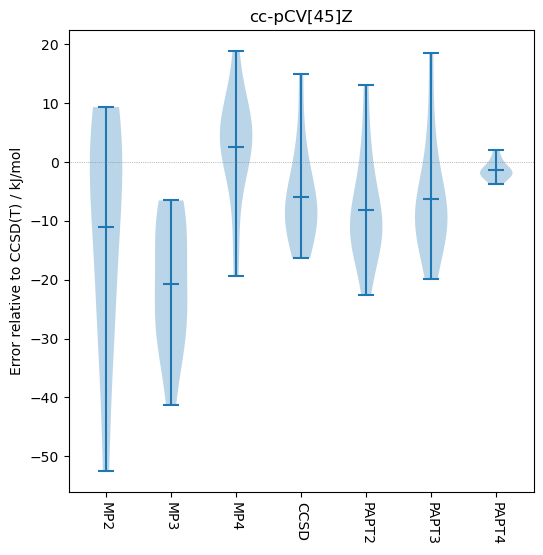

In [4]:
fig = violin_plot(bm)
fig.savefig((title + ' reaction energy deviations.pdf').replace(' ', '_'), transparent=True,bbox_inches='tight',pad_inches=0)
fig

In [5]:
len(bm['reaction energies'])

13

In [17]:
from git import Repo
repo = Repo('.')
repo.git.add(all_project_directories(bm))

''